# 📌 Decision Tree Regression on Diabetes Dataset
This notebook demonstrates how to use **Decision Tree Regression** on the **Diabetes dataset** to predict disease progression.

**Steps covered:**
1. Load and explore the dataset 📊
2. Perform data visualization and correlation analysis 📈
3. Train a **Decision Tree Regressor** 🌳
4. Evaluate model performance 📉
5. Visualize results 🎨


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 📌 Load and Explore the Data

In [5]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Convert to a DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # Add target variable

# Display first few rows
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## 📌 Check Dataset Statistics

In [8]:
# Basic statistics of the dataset
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [10]:
# Check for missing values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

## 📌 Data Visualization and Correlation Analysis

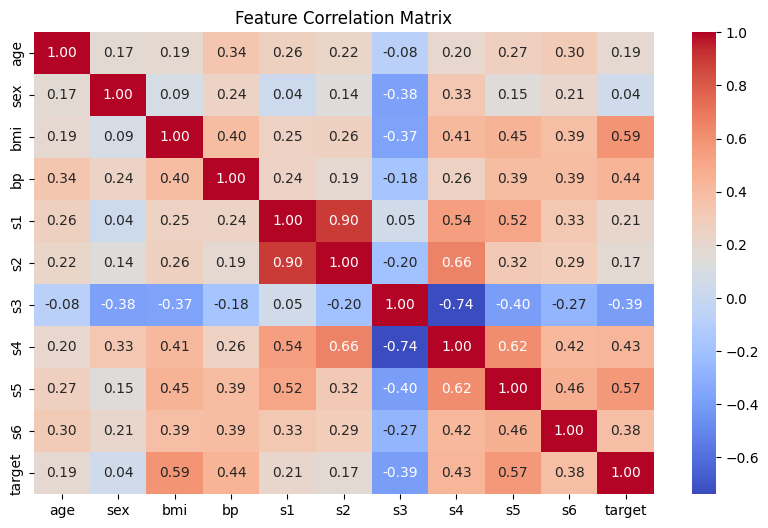

In [35]:
# Correlation matrix to see relationships between features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

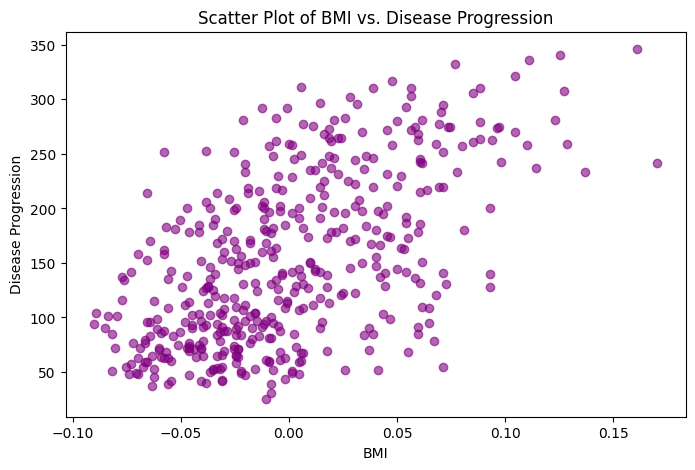

In [14]:
# Scatter plot to see relationship between BMI and target
plt.figure(figsize=(8, 5))
plt.scatter(df['bmi'], df['target'], color='purple', alpha=0.6)
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Scatter Plot of BMI vs. Disease Progression')
plt.show()

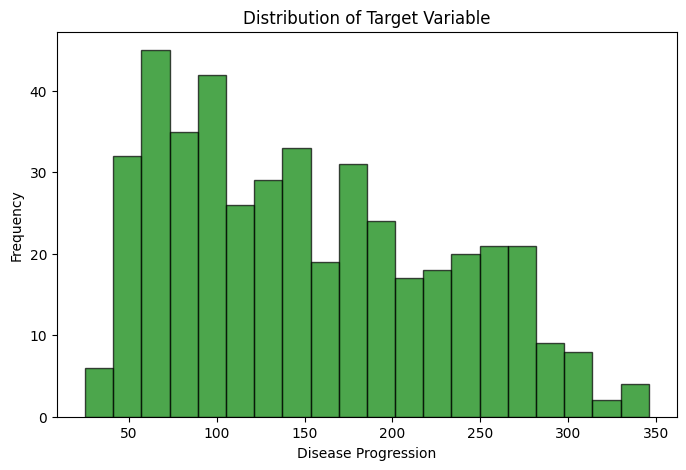

In [15]:
# Histogram of the target variable
plt.figure(figsize=(8,5))
plt.hist(df['target'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

## 📌 Select One Feature for Regression

In [17]:
# Select BMI as the feature (X) and target variable (y)
X = df[['bmi']].values  # Feature
y = df['target'].values  # Target

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 353
Testing samples: 89


## 📌 Train Decision Tree Regressor

In [19]:
# Create and train the Decision Tree model
dt_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

## 📌 Make Predictions

In [22]:
# Predict on test set
y_pred = dt_regressor.predict(X_test)

## 📌 Model Evaluation

In [25]:
# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 53.78
Mean Squared Error (MSE): 4391.21
R² Score: 0.17


In [39]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

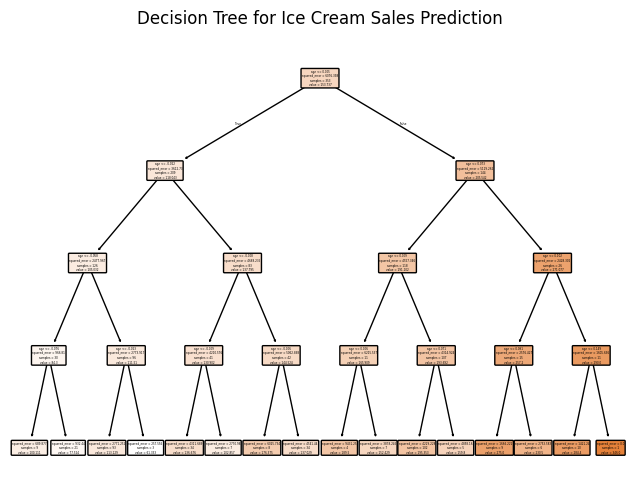

In [41]:
# Visualize the Decision Tree
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plot_tree(dt_regressor, feature_names=df.columns, filled=True, rounded=True)
plt.title("Decision Tree for Ice Cream Sales Prediction")
plt.show()